# Drug Prescribing System

In [296]:
from IPython.display import Image
Image(url= "https://esohub.files.wordpress.com/2016/03/prescription-expenses.jpg?w=1024")

## Objective 

 To design a Drug Recommending system based on patient condition.

## Data

**Licence:** CC0: Public Domain

**The feature sets are:**
* Drug type

**The feature sets are:**
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration

We have to predict the drug which is appropriate to treat to a patient based on details diven in the feature sets.
By using trained data we can predict the recommened drug when new test data is given by user.

### Machine learning algorithms used:

* KNN Classifier
* Random Forest Classifier
* Bagging Classifier
* Adaboost Classifier
* Gradientboot Classifier
* Decision Tree Classifie

## Table of Contents
1. Import Libraries
2. Checking DataSet
3. Exploratory Data Analysis
4. Data Visualisation
5. Preprocessing
6. Model Analysis
7. Prediction system


**Created by:** Deepika Kumar

## 1. Import Libraries

In [253]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.subplots as sp

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


%matplotlib inline

### 2. Checking DataSet

In [254]:
df = pd.read_csv('D:\program\Python\projects\ML\classification\drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### 3.Exploratory Data Analysis

In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [256]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [257]:
print("Shape of the dataframe",df.shape)
print("duplicated Value count",df.duplicated().sum())
analys = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
    
})
display(analys)

Shape of the dataframe (200, 6)
duplicated Value count 0


,Unique,Null,NullPercent,Type
Age,57,0,0.0,int64
Sex,2,0,0.0,object
BP,3,0,0.0,object
Cholesterol,2,0,0.0,object
Na_to_K,198,0,0.0,float64
Drug,5,0,0.0,object


> No Duplicated values\
> No Null Values

In [258]:
c=[]
for x, v in df.iterrows():
     
    if  v["Age"]<30:
         c.append("Young Adult")
    elif v["Age"] >= 30 and v["Age"]< 45:
        c.append("Adult")
    elif v["Age"] >= 45 and v["Age"]< 60:
        c.append("Senior")
    elif v["Age"] >= 60:
        c.append("Old Age")
        
    


In [259]:
df["Age_groups"]=c

In [260]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_groups
0,23,F,HIGH,HIGH,25.355,DrugY,Young Adult
1,47,M,LOW,HIGH,13.093,drugC,Senior
2,47,M,LOW,HIGH,10.114,drugC,Senior
3,28,F,NORMAL,HIGH,7.798,drugX,Young Adult
4,61,F,LOW,HIGH,18.043,DrugY,Old Age
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,Senior
196,16,M,LOW,HIGH,12.006,drugC,Young Adult
197,52,M,NORMAL,HIGH,9.894,drugX,Senior
198,23,M,NORMAL,NORMAL,14.020,drugX,Young Adult


### 4. Data Visualisation

### Catogorize based on drug

In [261]:
c=['#8819c0',"#c01951","#19a5c0","#51c019","#19c088"]

In [262]:
def summary_with_graph(dataframe, col_name):
    d=dataframe[col_name].value_counts().values.tolist()
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])
 #BAr Plot   
    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=c,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)#1 nd subplot
#Pie chart
    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,hole=.7,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=True,
                         name=col_name,
                         marker=dict(colors=c, line=dict(color='#000000', width=1))),

                  row=1, col=2)#2 nd subplot
    
    fig.add_annotation(dict(x=0.81, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="Drug"))
    
    fig.update_layout(margin=dict(t=50, b=35, l=0, r=0),title={'text': "Drug Based analysis",'y': 0.95,'x': 0.45,'xanchor': 'center','yanchor': 'top'},
                      plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',template='plotly_white',
                      title_font_color='#0000e6',
                      font=dict(size=17, color='#000000'),
                      hoverlabel=dict( font_size=13, font_family="Lato, sans-serif"))
                    

    iplot(fig)

In [263]:
summary_with_graph(df, 'Drug')

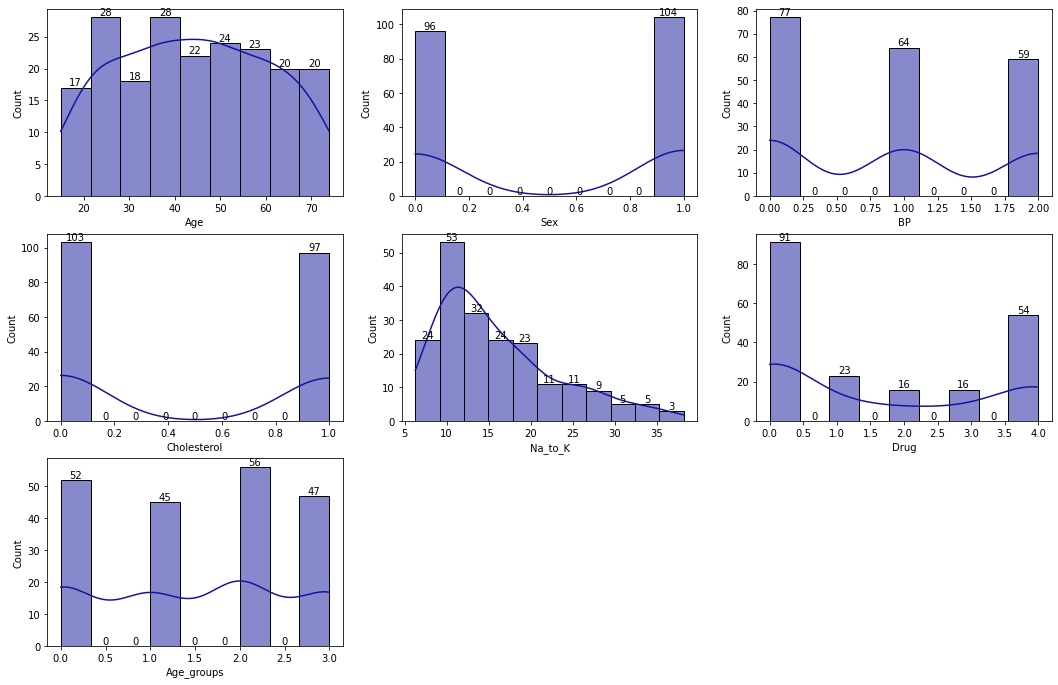

In [300]:
#Distribution of all variables

plot = 1
plt.figure(figsize=(18,20))
for i in df.columns: 
    plt.subplot(5,3,plot)
    ax = sns.histplot(data = df , x = i , kde = True, palette="bright",color=(19/255,20/255,156/255) )
    plt.xlabel(i)
    plot+=1
    for i in ax.containers:     #to set a label on top of the bars.
        ax.bar_label(i,)

### Gender and Age Based analysis

In [265]:
px.bar(data_frame=df, x="Drug", color="Sex")


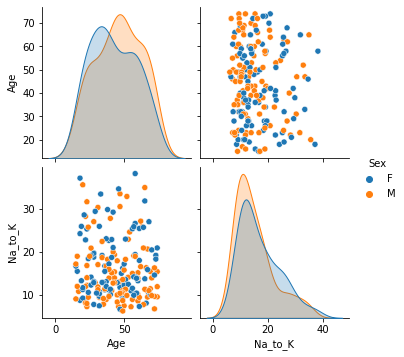

In [266]:
sns.pairplot(df,hue="Sex")

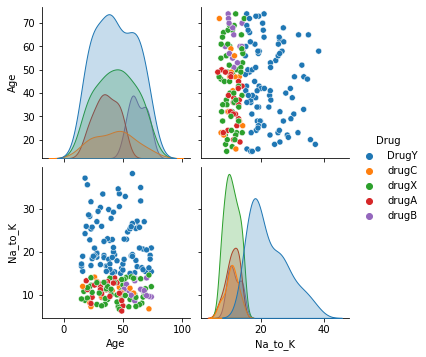

In [267]:
sns.pairplot(df,hue="Drug")

In [268]:
def Nested_pie(data,Drug,att):
    fig=px.sunburst(df,path=[Drug,att])
    fig.update_layout(margin=dict(t=50, b=35, l=0, r=0),title={'text': att,'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top'},
                      plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',template='plotly_white',
                      title_font_color='#0000e6',
                      font=dict(size=17, color='#000000'),
                      hoverlabel=dict( font_size=13, font_family="Lato, sans-serif"))              
                    
            
    
    fig.show()

In [269]:
col=df.columns.tolist()
for i in col:
    if i!='Drug':
        if i!=('Na_to_K') or ("Age"):
            
        
            Nested_pie(df,"Drug",i)

In [270]:
fig=px.sunburst(df,path=["Drug","Sex","BP"])
fig.update_layout(margin=dict(t=50, b=35, l=0, r=0),title={"text":"Drugs based categorization\nft.Sex and BP ",'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top'})

In [271]:
fig=px.sunburst(df,path=["Drug","Sex","Cholesterol"])
fig.update_layout(margin=dict(t=50, b=35, l=0, r=0),title={"text":"Drugs based categorization\nft.Sex and Cholesterol ",'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top'})

In [272]:
fig=px.sunburst(df,path=["Drug","Sex","Age_groups"])
fig.update_layout(margin=dict(t=50, b=35, l=0, r=0),title={"text":"Drugs based categorization\nft.Sex and Age Group ",'y': 0.95,'x': 0.5,'xanchor': 'center','yanchor': 'top'})

In [273]:
px.sunburst(df,path=["Drug","Age_groups"])

In [274]:
import plotly.express as px

fig = px.histogram(df, x="Age", color="Drug")
fig.show()

In [275]:
col=["Age_groups","BP","Cholesterol","Sex"]
for i in col:
    if i!='Drug':
        fig = px.histogram(df, x=i, color="Drug")
        fig.show()
                   
        

Inferences
> Drug Y is most commonly prescribed medication.\
> Drug X is second most commonly prescribed medication.It is not prescribed to People with High BP\
> Drug C is prescribed only when with Low BP and High Cholesterol Patients.\
> Drug A & B is prescribed only to people with High BP\
> Drug A recomended to 20-50 age group meanwhile Drug B recomended to the older group.


## 5. Preprocessing

In [276]:
from sklearn.preprocessing import LabelEncoder


In [278]:
df.loc[58]

Age                 60
Sex                  M
BP              NORMAL
Cholesterol     NORMAL
Na_to_K         10.091
Drug             drugX
Age_groups     Old Age
Name: 58, dtype: object

In [279]:
df['Cholesterol'] = LabelEncoder().fit_transform(df['Cholesterol'])
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['BP'] = LabelEncoder().fit_transform(df['BP'])
df['Drug'] = LabelEncoder().fit_transform(df['Drug'])
df['Age_groups'] = LabelEncoder().fit_transform(df['Age_groups'])



In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
 6   Age_groups   200 non-null    int32  
dtypes: float64(1), int32(5), int64(1)
memory usage: 7.2 KB


In [281]:
df.loc[58]

Age            60.000
Sex             1.000
BP              2.000
Cholesterol     1.000
Na_to_K        10.091
Drug            4.000
Age_groups      1.000
Name: 58, dtype: float64

### Correlation analysis


In [209]:
corr=df.corr()
corr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_groups
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856,-0.345794
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239,-0.035592
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397,0.048316
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415,-0.112578
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051,0.056533
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000,0.030661
Age_groups,-0.345794,-0.035592,0.048316,-0.112578,0.056533,0.030661,1.000000


<AxesSubplot:>

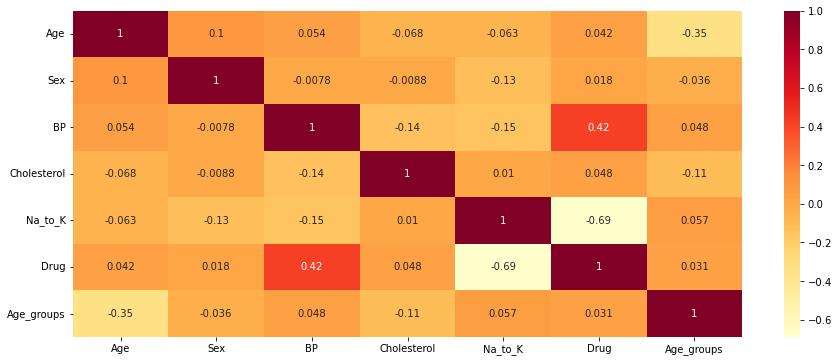

In [210]:
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='YlOrRd')

In [211]:
df.corr()["Drug"].sort_values()


Na_to_K       -0.689051
Sex            0.018239
Age_groups     0.030661
Age            0.041856
Cholesterol    0.048415
BP             0.419397
Drug           1.000000
Name: Drug, dtype: float64

BP and Cholesterol  are more related to drug prescription.

## 6. Model Analysis

In [214]:
from sklearn.model_selection import train_test_split

### Train and Test Data Split
x=df.drop(columns=['Drug',"Age_groups"])
y=df['Drug']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


In [215]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [217]:
print('Train Dataset Shape :',x_train.shape[0])
print('Test Dataset Shape :',y_train.shape[0])

Train Dataset Shape : 160
Test Dataset Shape : 160


### Model Training

In [218]:
# Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [219]:

algorithm = [('KNN Classifier', KNeighborsClassifier()), 
              ('Random Forest Classifier', RandomForestClassifier()),
              ('Bagging Classifier', BaggingClassifier()),
              ('Adaboost Classifier', AdaBoostClassifier()), 
              ('Gradientboot Classifier',GradientBoostingClassifier()),
              ('Decision Tree Classifier', DecisionTreeClassifier())
             ]

trained_models=[]
model_score={}

for index,ml in enumerate(algorithm):
    model=ml[1]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    model_score[ml[0]] = str(model.score(x_train,y_train)*100)+'%'
    trained_models.append((ml[0],model))

### Accuracy Score

In [220]:
for key in model_score:
    print(key,'=',model_score[key])

KNN Classifier = 83.125%
Random Forest Classifier = 100.0%
Bagging Classifier = 99.375%
Adaboost Classifier = 84.375%
Gradientboot Classifier = 100.0%
Decision Tree Classifier = 100.0%


### Model Evaluation


In [221]:
# Metric Evaluation Libriaries
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc,RocCurveDisplay

In [222]:
def conf_matrix(algo,model):
    print(algo)
    plt.figure(figsize=(8,5))
    pred=model.predict(x_test)
    cm=confusion_matrix(y_test,pred)
    print(y_test.shape,pred.shape)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,cmap='YlOrRd')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Label')
    plt.show()

KNN Classifier
(40,) (40,)


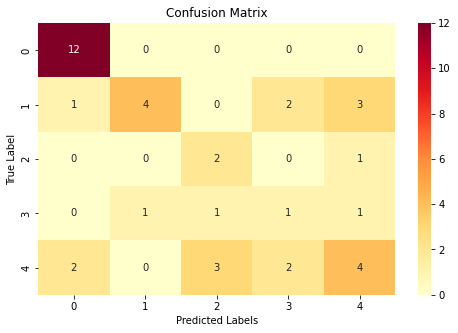

Random Forest Classifier
(40,) (40,)


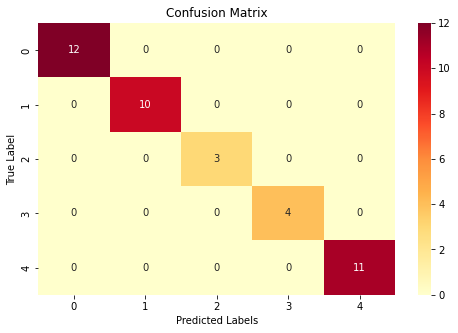

Bagging Classifier
(40,) (40,)


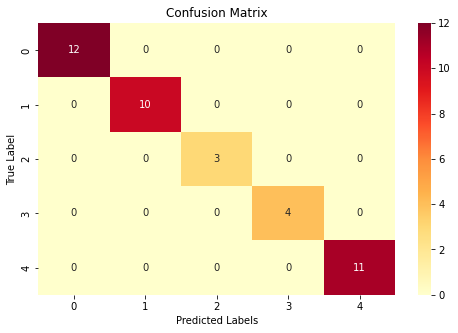

Adaboost Classifier
(40,) (40,)


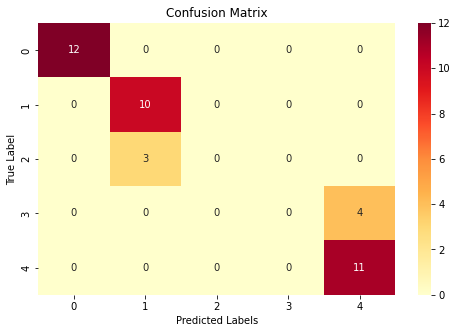

Gradientboot Classifier
(40,) (40,)


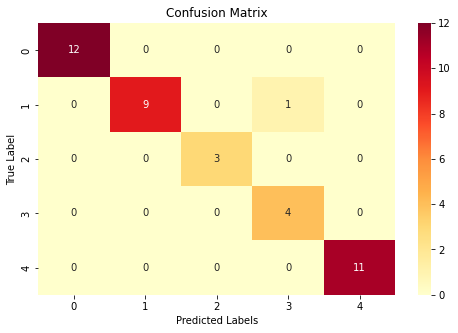

Decision Tree Classifier
(40,) (40,)


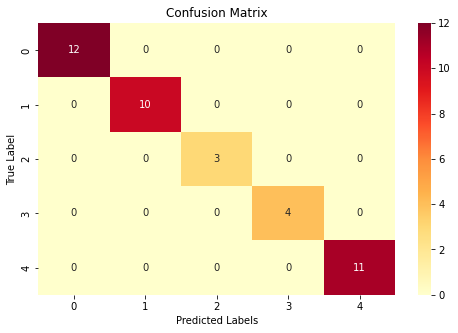

In [223]:
for index,ml in enumerate(trained_models):
    conf_matrix(ml[0],ml[1])

In [224]:
def classify_report(algo,model):
    print(algo+' Report :')
    pred=model.predict(x_test)
    print(classification_report(y_test,pred))

In [225]:
for index,ml in enumerate(trained_models):
    classify_report(ml[0],ml[1])
    print('\n')

KNN Classifier Report :
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.80      0.40      0.53        10
           2       0.33      0.67      0.44         3
           3       0.20      0.25      0.22         4
           4       0.44      0.36      0.40        11

    accuracy                           0.57        40
   macro avg       0.52      0.54      0.50        40
weighted avg       0.61      0.57      0.57        40



Random Forest Classifier Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg     

C:\Users\deepi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\deepi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\deepi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [226]:
def p_roc_curve(algo,model):
    print(algo)
    y_pred_proba=model.predict_proba(x_test)[::,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
    roc_auc=auc(fpr,tpr)
    curve=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
    curve.plot()
    plt.show()

### Cross valaidation

In [227]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
algo=[KNeighborsClassifier(),RandomForestClassifier(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

def model_fit():
    scoring = 'accuracy'
    print("Cross Validation Score of Each Model\n")
    for i in range(len(algo)):
        score = cross_val_score(algo[i], x, y, cv=k_fold, n_jobs=1, scoring=scoring)
        print(algo[i],":",(np.mean(score)*100,2))
        


In [228]:
model_fit()

Cross Validation Score of Each Model

KNeighborsClassifier() : (71.00000000000001, 2)
RandomForestClassifier() : (99.0, 2)
AdaBoostClassifier() : (83.5, 2)
BaggingClassifier() : (99.0, 2)
GradientBoostingClassifier() : (98.5, 2)


## 7. Prediction system

In [249]:
age=int(input("Patient age\t"))
sex=(input("Patient sex \t M/F\t"))
Bp=int(input("Patient Blood Pressure\n0--> High 1--> Low 2--> Normal\t"))
Cholesterol=int(input("Patient Cholesterol\n0--> High 1--> Normal\t"))
Na_to_K=float(input("Patient Na_to_K Value\t"))

if sex=="M":
    sex=1
else:
    sex=0


patient=[[age,sex,Bp,Cholesterol,Na_to_K]]


Patient age	45
Patient sex 	 M/F	F
Patient Blood Pressure
0--> High 1--> Low 2--> Normal	2
Patient Cholesterol
0--> High 1--> Normal	1
Patient Na_to_K Value	32


In [250]:
patient

[[45, 0, 2, 1, 32.0]]

In [290]:
for index,ml in enumerate(algorithm):
    model=ml[1]
    drug=model.predict(patient)

    
    if drug==[0]:
        print(print(ml[0]," Prediction:"),drug)
        print("prescribed drug:DrugY ")
    elif drug==[4]:
        print(print(ml[0]," Prediction:"),drug)
        print("prescribed drug:DrugX ")
    elif drug==[1]:
        print(print(ml[0]," Prediction:"),drug)
        print("prescribed drug:DrugA ")
    elif drug==[2]:
        print(print(ml[0]," Prediction:"),drug)
        print("prescribed drug:DrugB ")
    elif drug==[3]:
        print(print(ml[0]," Prediction:"),drug)
        print("prescribed drug:DrugC ")
    else:
        print("--")
        
        

KNN Classifier  Prediction:
None [0]
prescribed drug:DrugY 
Random Forest Classifier  Prediction:
None [0]
prescribed drug:DrugY 
Bagging Classifier  Prediction:
None [0]
prescribed drug:DrugY 
Adaboost Classifier  Prediction:
None [0]
prescribed drug:DrugY 
Gradientboot Classifier  Prediction:
None [0]
prescribed drug:DrugY 
Decision Tree Classifier  Prediction:
None [0]
prescribed drug:DrugY 
